### Cross Validation and Stratified Shuffle Split
Here is a flowchart of typical cross validation workflow in model training. The best parameters can be determined by grid search techniques
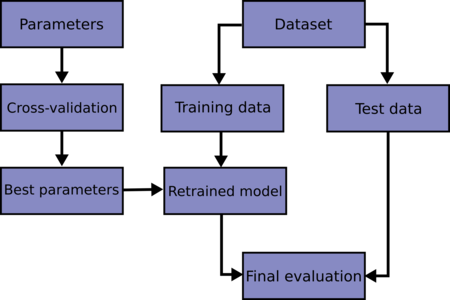

When model is searching a good **hyperparameters combination** there is still a **risk of overfitting** on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the **test set can “leak”** into the model and evaluation metrics no longer report on generalization performance. 

To solve this problem, another part of the dataset can be held out called “validation set”. Splitting **training set into again train and test set** is a problem as we lose amount of data. To solve the problem, Cross - Validation approach was developed

### Train Test Split
Simply splits the dataset into two groups **train and test**. It is required to provide test_size as well as set **random state** parameter.

### Simple K - Fold Cross - Validation
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.
It is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data and how well the model can generalize.

It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split

Algorithm
- Shuffle the dataset randomly 
- Split the dataset into k groups
- Take one group as test set and others as training set
- Fit the model and get the score according to provided metric
- Retain the score and discard the model
- Repeat for the rest groups, then take the average of scores
- There is repeated k - fold cross validation which is simply conducts several cross validation with different randomization in each repetition

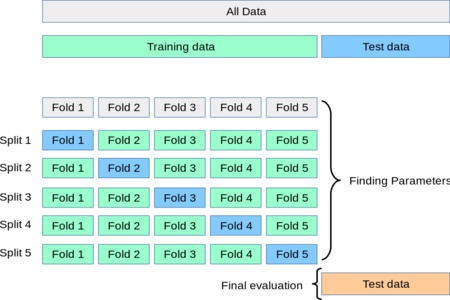
**Important**
- Dataset shuffles only once
- Test Sets don't overlap and used only onced
- When coding, it returns **indeces** for both x_train and y_train not elements of x_train, y_train
- **Shape** of x_train and y_train **must be equal**

### Leave One Out Cross - Validation ( LOO )
Here each set is created by taking all the samples except one, the test set being the sample left out. Thus, for  samples, we have  different training sets and  different tests set. This cross-validation procedure does not waste much data as only one sample is removed from the training set
**Important**
- Results in high variance as each new model is built on almost similar folds. Thus,  they are almost identical.
- Rarely used and 5/10 Folds Cross Validation is preferable

### Shuffle Split 
Similar to Simple K - Fold Cross - Validation except that each time before splitting the data is shuffled and test size can be specified
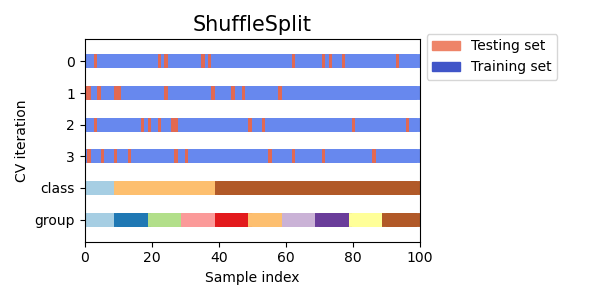
**Important**
- Shuffle Split is not affected by classes/groups imbalance. When data is **imbalanced, apply Stratified algorithms** 
- Test sets may overlap

### What is Stratification?
Stratification is the process of rearranging the data as to ensure each fold is a good representative of the whole. For example in a binary classification problem where each class comprises 50% of the data, it is best to arrange the data such that in every fold, each class comprises around half the instances.

## Stratified K - Fold Cross Validation 
It is the same as usual K - Fold Cross Validation except that each fold both train and test must contain **each class**.
For this purpose, each class is splitted into K - folds and each fold of each class takes part in train and test
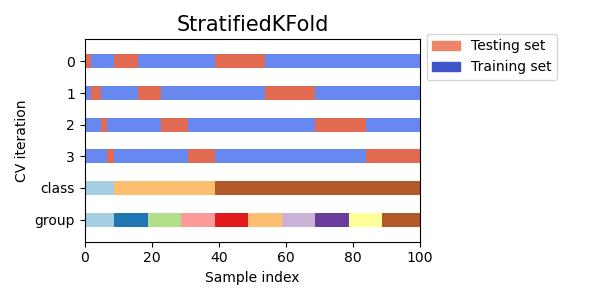
**Important**
- Test Sets don't overlap 
- Each fold is affected by classes imbalance
- Repeated Stratified K-Fold repeats n times with different randomization in each repetition

### Stratified Shuffle Split 
It is variation of Shuffle Split. First, it shuffles the data and then splits it into k - parts ( n_splits) but for **the next split it shuffles the data again**. 

Thus, the same values can appear in test set (test set may overlap). So the difference between Stratified K - Fold Cross Validation and Stratified Shiffle Split is simply **shuffle parameter and test set overlapping**.

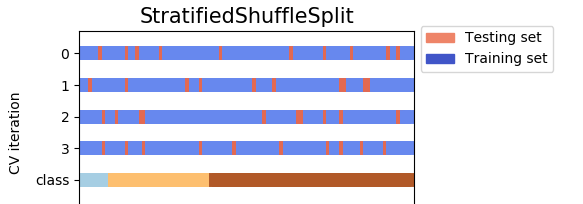
**Important**
- Test Sets may overlap
- Each fold is affected by class imbalance ( means that each class is presented in each fold. Thus, a model see each class both in train and test sets)

### Time Series Cross Validation

Time series data is characterised by the correlation between observations that are near in time (autocorrelation). However, classical cross-validation techniques such as KFold and ShuffleSplit assume the samples are independent and identically distributed, and would result in unreasonable correlation between training and testing instances (yielding poor estimates of generalisation error) on time series data. Therefore, it is very important to evaluate our model for time series data on the “future” observations least like those that are used to train the model

### Time Series Split
TimeSeriesSplit is a variation of k-fold which returns first k - folds as train set and the k + 1 fold as test set. Note that unlike standard cross-validation methods, successive training sets are supersets of those that come before them. Also, it adds all surplus data to the first training partition, which is always used to train the model.
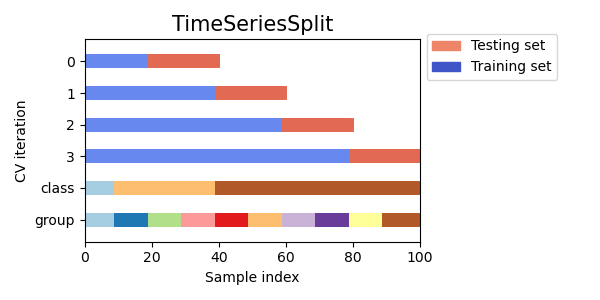

### Eaxamples

In [115]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit,TimeSeriesSplit
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

In [5]:
x,y = datasets.load_iris(return_X_y=True)
print(x.shape, y.shape)

(150, 4) (150,)


### Train Test Split

In [10]:
# Both x_test and y_test have 20% 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(f'x_train shape: {x_train.shape}'+'\n'+
      f'y_train shape: {y_train.shape}'+'\n'+
      f'x_test shape: {x_test.shape}' + '\n'+
      f'y_test shape: {y_test.shape}')

x_train shape: (120, 4)
y_train shape: (120,)
x_test shape: (30, 4)
y_test shape: (30,)


### Simple Cross Validation

In [58]:
# Example for odd and even shapes. If shapes don't match, an error will occur
x = np.array([4,3,8,9,10,23,44,0])
y = np.array([1,9,4,2,22,11,30,31])
fold = KFold(n_splits=2,shuffle=False,random_state=42)
for train_idx,test_idx in fold.split(x,y):
    print('Fold')
    print(f'x_train: {x[train_idx]}, y_train:{y[train_idx]}')
    print(f'x_test: {x[test_idx]}, y_test: {y[test_idx]}')
    print('\n')

Fold
x_train: [10 23 44  0], y_train:[22 11 30 31]
x_test: [4 3 8 9], y_test: [1 9 4 2]


Fold
x_train: [4 3 8 9], y_train:[1 9 4 2]
x_test: [10 23 44  0], y_test: [22 11 30 31]




### Leave One Out Cross Validation

In [62]:
x = np.array([4,3,8,9,10])
y = np.array([1,9,4,2,22])

# Each element is used in test set
folds = LeaveOneOut()
for train_idx, test_idx in folds.split(x,y):
    print('Fold')
    print(f'x_train: {x[train_idx]}, y_train: {y[train_idx]}')
    print(f'x_test: {x[test_idx]}, y_test: {y[test_idx]}')
    print('\n')

Fold
x_train: [ 3  8  9 10], y_train: [ 9  4  2 22]
x_test: [4], y_test: [1]


Fold
x_train: [ 4  8  9 10], y_train: [ 1  4  2 22]
x_test: [3], y_test: [9]


Fold
x_train: [ 4  3  9 10], y_train: [ 1  9  2 22]
x_test: [8], y_test: [4]


Fold
x_train: [ 4  3  8 10], y_train: [ 1  9  4 22]
x_test: [9], y_test: [2]


Fold
x_train: [4 3 8 9], y_train: [1 9 4 2]
x_test: [10], y_test: [22]




### Shuffle Split

In [68]:
x = np.array([4,3,8,9,10,23,44,0])
y = np.array([1,9,4,2,22,11,30,31])

# Elements from test sets do overlap!
folds = ShuffleSplit(n_splits=3, test_size=0.2)
for train_idx, test_idx in folds.split(x,y):
    print('Fold')
    print(f'x_train: {x[train_idx]}, y_train: {y[train_idx]}')
    print(f'x_test: {x[test_idx]}, y_test: {y[test_idx]}')
    print('\n')

Fold
x_train: [10  4  9  3  0 23], y_train: [22  1  2  9 31 11]
x_test: [ 8 44], y_test: [ 4 30]


Fold
x_train: [44  4  9 10 23  3], y_train: [30  1  2 22 11  9]
x_test: [0 8], y_test: [31  4]


Fold
x_train: [ 0 10  9  3 44  8], y_train: [31 22  2  9 30  4]
x_test: [ 4 23], y_test: [ 1 11]




### Stratified K - Fold Cross Validation

In [110]:
x = np.ones((50,1))
y = np.hstack(([0]*45,[1]*5))
print('X shape:', x.shape)
print('y shape:', y.shape)
print(f'Class 1 has: {np.bincount(y)[0]} Elements\nClass 2 has: {np.bincount(y)[1]} Elements')
n_splits 


# All classes of target are "equally" presented in both train and test folds. Thus, a model has seen both classes
strat_folds = StratifiedKFold(n_splits=n_splits)
folds = KFold(n_splits=n_splits,random_state=42)
print('\n')
for train_idx, test_idx in strat_folds.split(x,y):
    print(f'y_train_class_ratio: {np.round(np.bincount(y[train_idx])/np.bincount(y),2)}'+ ' | '+
          f'y_test_class_ratio: {np.round(np.bincount(y[test_idx])/np.bincount(y),2)}')

X shape: (50, 1)
y shape: (50,)
Class 1 has: 45 Elements
Class 2 has: 5 Elements


y_train_class_ratio: [0.67 0.6 ] | y_test_class_ratio: [0.33 0.4 ]
y_train_class_ratio: [0.67 0.6 ] | y_test_class_ratio: [0.33 0.4 ]
y_train_class_ratio: [0.67 0.8 ] | y_test_class_ratio: [0.33 0.2 ]


### Stratified Shuffle Split

In [114]:
# Both classes are presented in both train and test folds. But due to shuffling before splitting each time classes
# are not equally distributed, proportion is not the same
st_shuffle_splits = StratifiedShuffleSplit(n_splits=n_splits)
for train_idx, test_idx in st_shuffle_splits.split(x,y):
    print(f'y_train_class_ratio: {np.round(np.bincount(y[train_idx])/np.bincount(y),2)}'+ ' | '+
          f'y_test_class_ratio: {np.round(np.bincount(y[test_idx])/np.bincount(y),2)}')

y_train_class_ratio: [0.89 1.  ] | y_test_class_ratio: [0.11 1.  ]
y_train_class_ratio: [0.89 1.  ] | y_test_class_ratio: [0.11 1.  ]
y_train_class_ratio: [0.91 0.8 ] | y_test_class_ratio: [0.09 0.2 ]


### Time Sereis Cross Validation

In [116]:
# Validates only on feature observations
x = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit(n_splits=3)
print(tscv)
TimeSeriesSplit(max_train_size=None, n_splits=3)
for train, test in tscv.split(x):
    print("%s %s" % (train, test))


TimeSeriesSplit(max_train_size=None, n_splits=3)
[0 1 2] [3]
[0 1 2 3] [4]
[0 1 2 3 4] [5]
